In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_dataset = pd.read_csv('C:/Users/AL - ELMIA/Desktop/titanic/titanic.csv')
print(titanic_dataset.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [24]:
titanic_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic_dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
titanic_dataset.shape

(891, 12)

In [13]:
titanic_dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
titanic_dataset['Age'].fillna(titanic_dataset['Age'].median(), inplace=True)
titanic_dataset['Embarked'].fillna(titanic_dataset['Embarked'].mode()[0])
titanic_dataset.drop('Cabin', axis=1, inplace=True)
titanic_dataset.isna().sum()

C:\Users\AL - ELMIA\AppData\Local\Temp\ipykernel_11184\726130100.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_dataset['Age'].fillna(titanic_dataset['Age'].median(), inplace=True)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [43]:
from sklearn.impute import KNNImputer
impute=KNNImputer()


In [102]:
for i in titanic_dataset.select_dtypes(include='number').columns:
    titanic_dataset[i]=impute.fit_transform(titanic_dataset[[i]])

In [103]:
titanic_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [39]:
titanic_dataset.duplicated().sum()

np.int64(0)

In [21]:
for col in titanic_dataset.select_dtypes(include='object').columns:
    print(titanic_dataset[col].value_counts())  
    print("***" * 10)

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Uruchurtu, Don. Manuel E                               1
Spencer, Mrs. William Augustus (Marie Eugenie)         1
Glynn, Miss. Mary Agatha                               1
Wheadon, Mr. Edward H                                  1
Meyer, Mr. Edgar Joseph                                1
Name: count, Length: 891, dtype: int64
******************************
Sex
male      577
female    314
Name: count, dtype: int64
******************************
Ticket
347082             7
1601               7
CA. 2343           7
3101295            6
CA 2144            6
                  ..
SOTON/OQ 392076    1
211536             1
112053             1
111369       

In [25]:
titanic_dataset.describe(include=object)

,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Dooley, Mr. Patrick",male,347082,S
freq,1,577,7,644


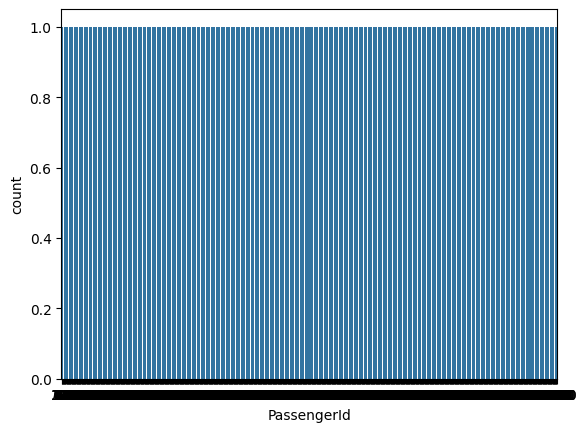

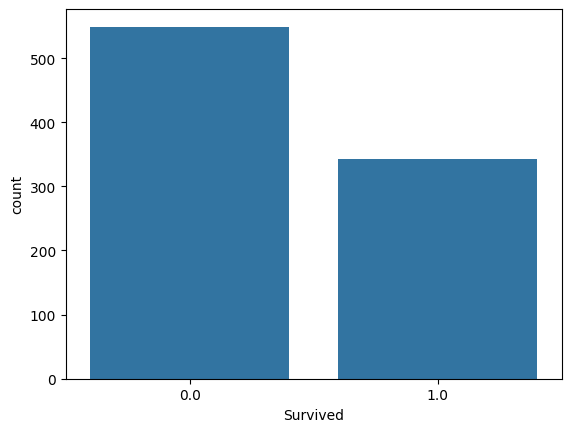

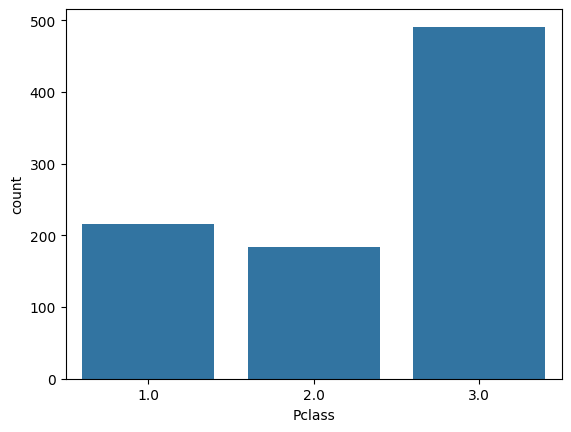

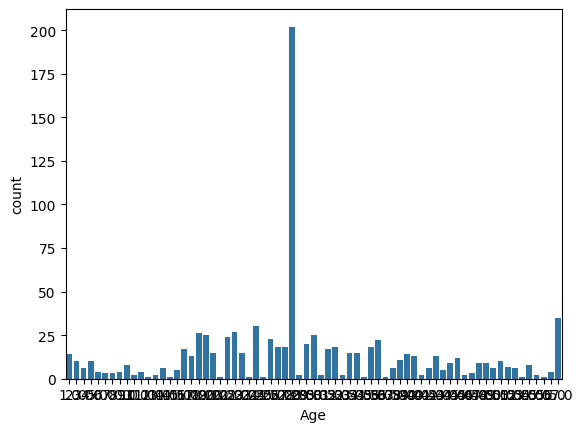

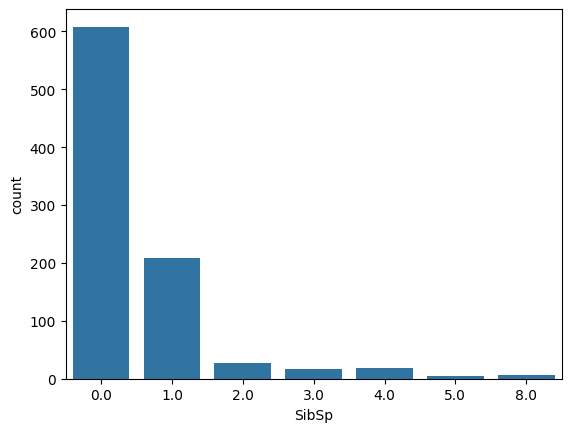

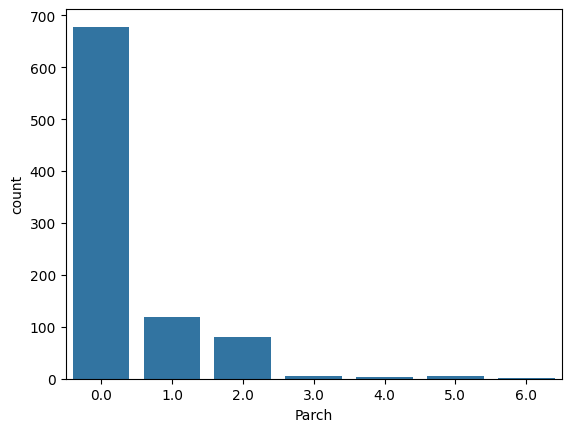

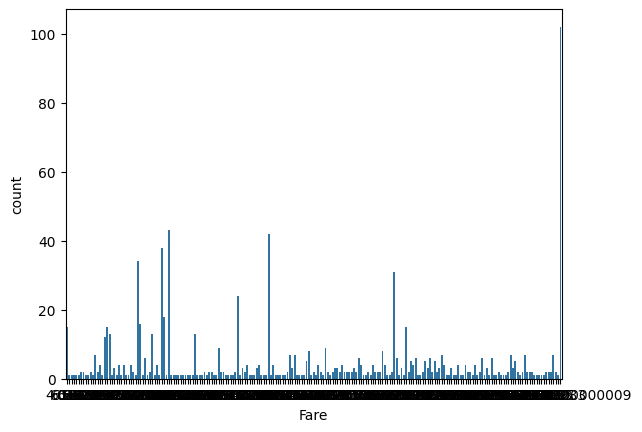

In [70]:
for i in titanic_dataset.select_dtypes(include='number').columns:
    sns.countplot(data=titanic_dataset,x=i)
    plt.show()

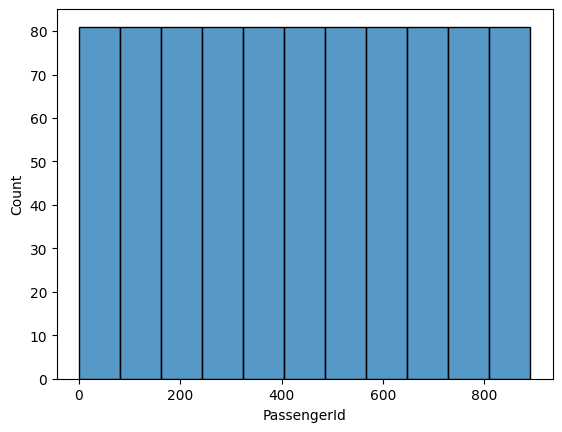

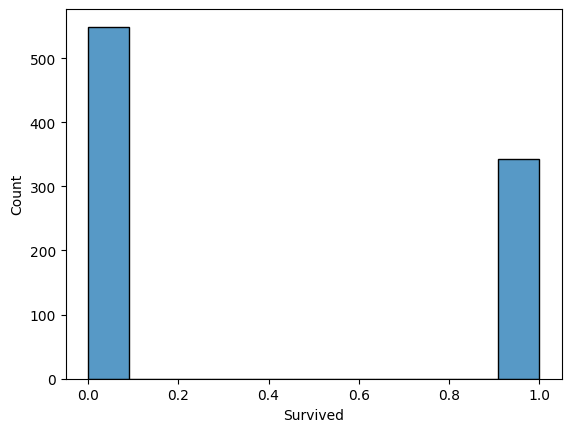

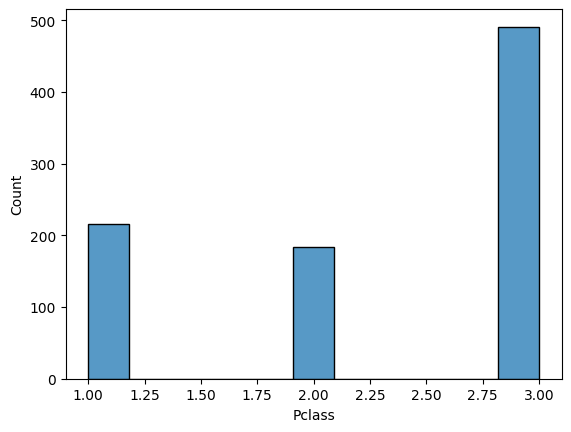

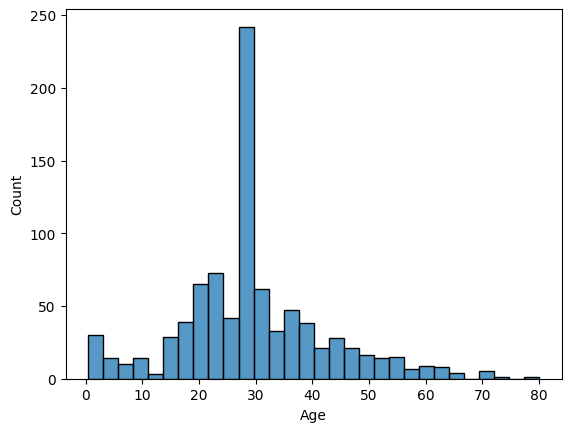

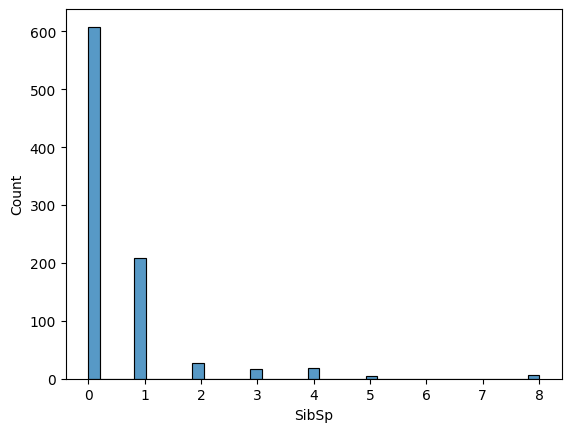

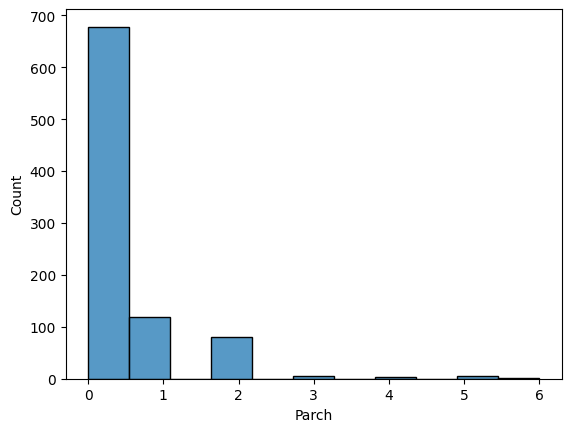

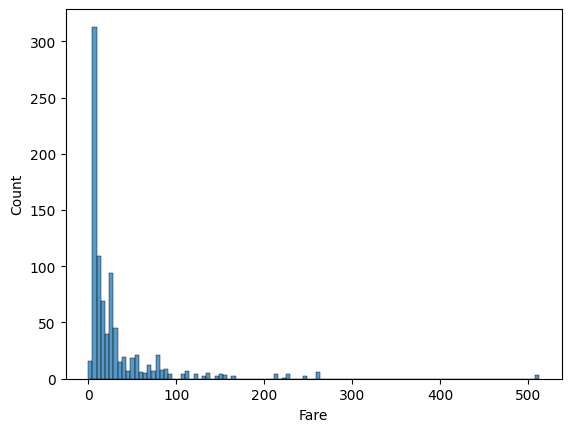

In [26]:
for i in titanic_dataset.select_dtypes(include='number').columns:
    sns.histplot(data=titanic_dataset,x=i)
    plt.show()

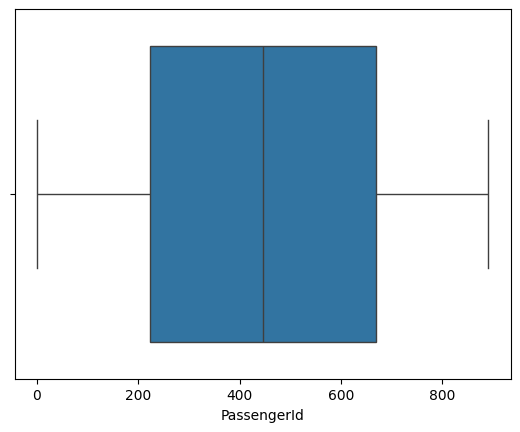

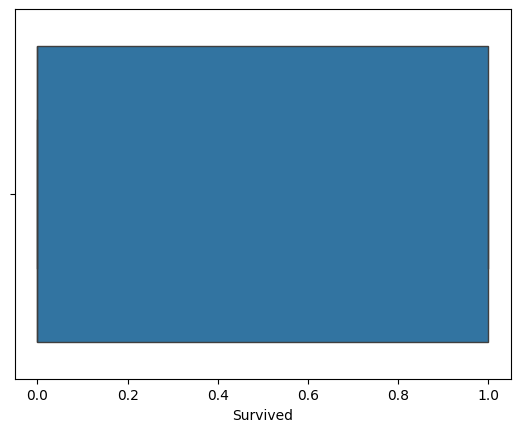

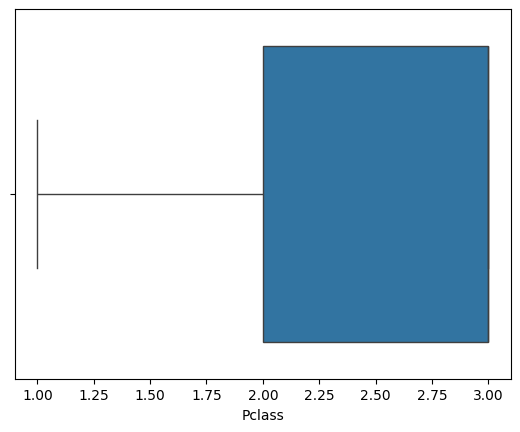

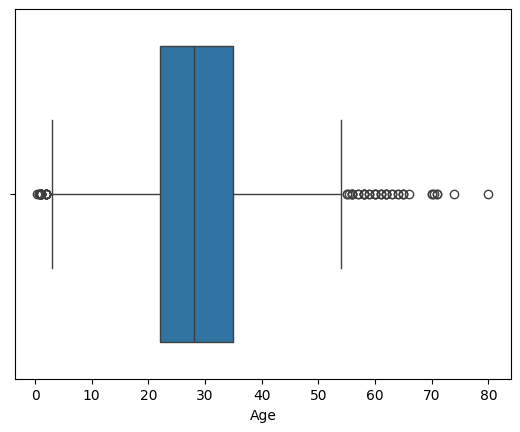

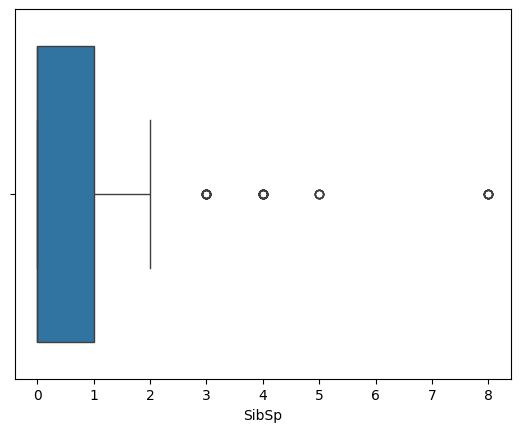

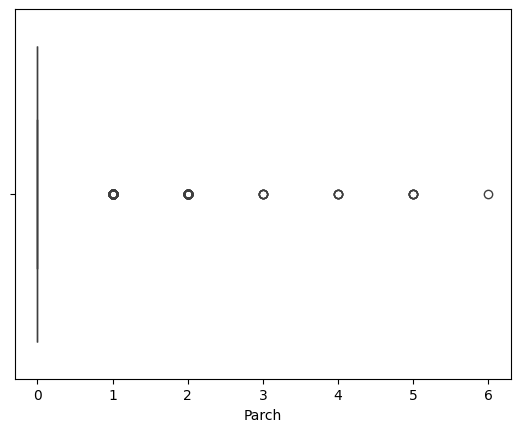

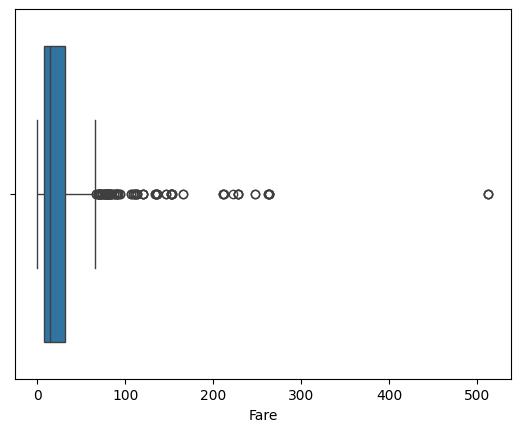

In [27]:
for i in titanic_dataset.select_dtypes(include='number').columns:
    sns.boxplot(data=titanic_dataset,x=i)
    plt.show()

#scatter plot for relation

In [29]:
titanic_dataset.select_dtypes(include='number').columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

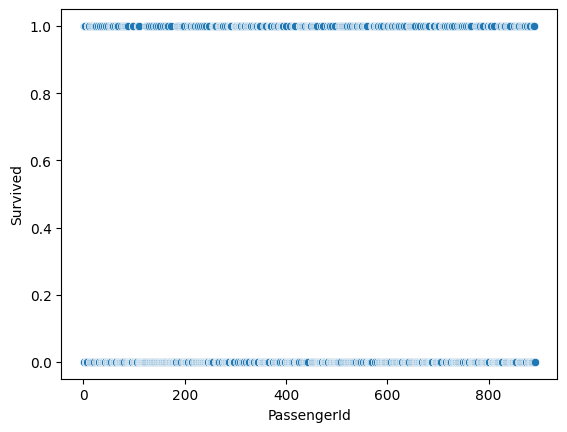

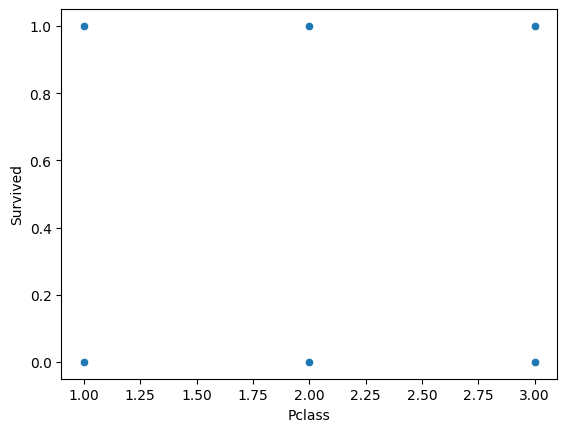

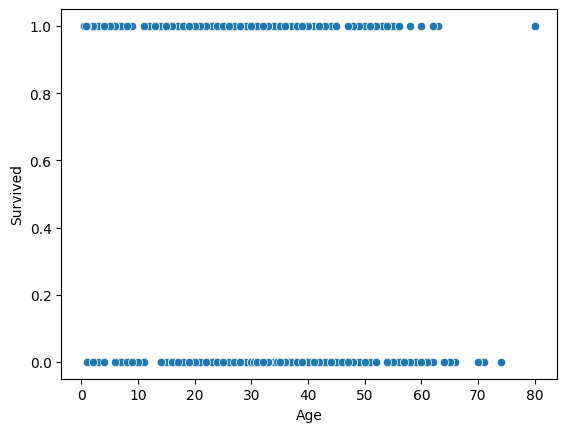

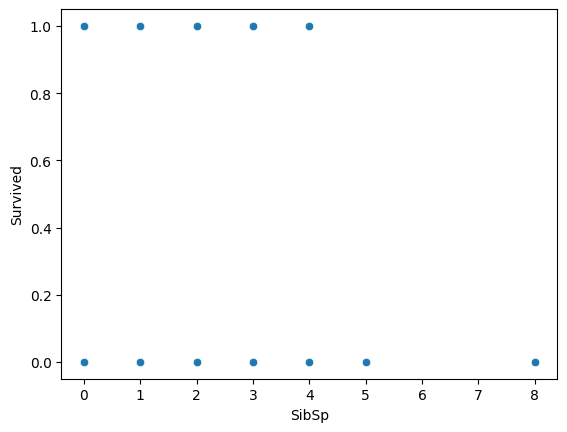

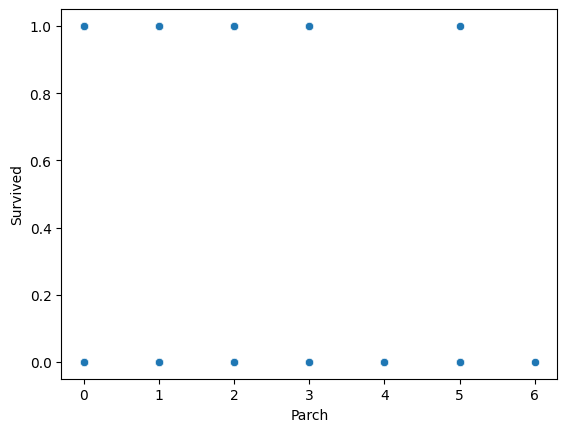

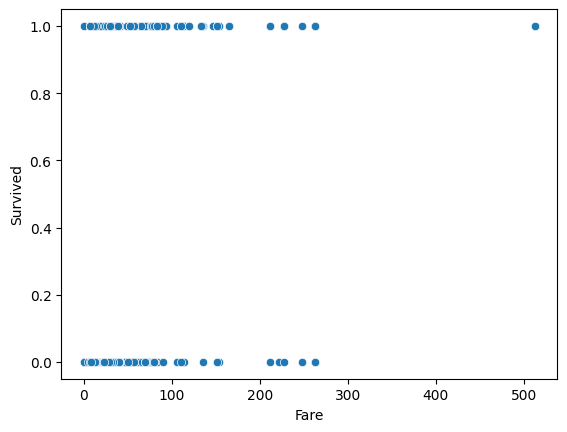

In [30]:
for i in ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'] :
    sns.scatterplot(data=titanic_dataset,x=i ,y='Survived')
    plt.show()

<Figure size 1200x1000 with 0 Axes>

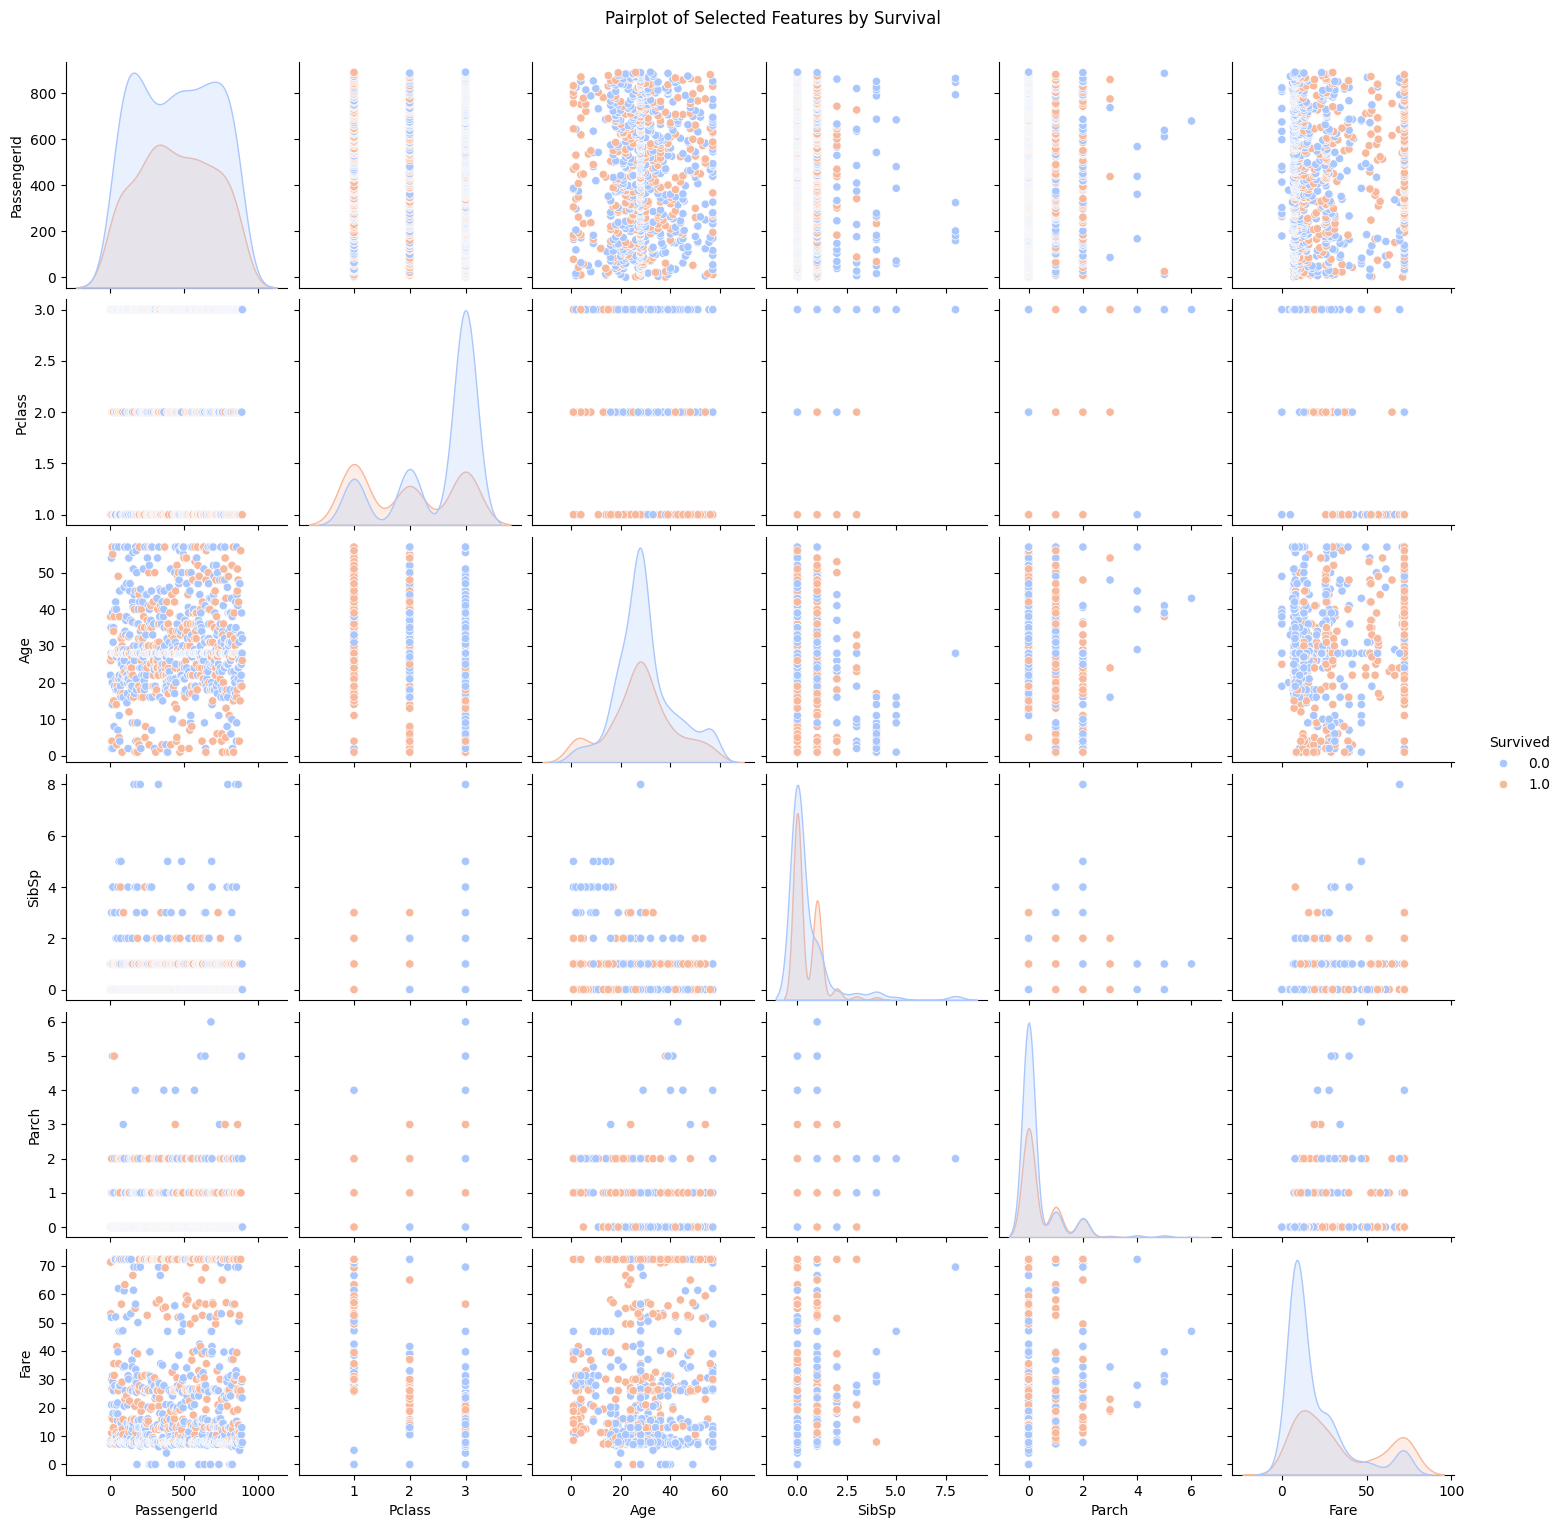

In [94]:
plt.figure(figsize=(12, 10))
sns.pairplot(titanic_dataset[['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked']], hue='Survived', palette='coolwarm')
plt.suptitle('Pairplot of Selected Features by Survival', y=1.02)
plt.show()

In [36]:
s=titanic_dataset.select_dtypes(include='number').corr()
print(s)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096688  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


<Axes: >

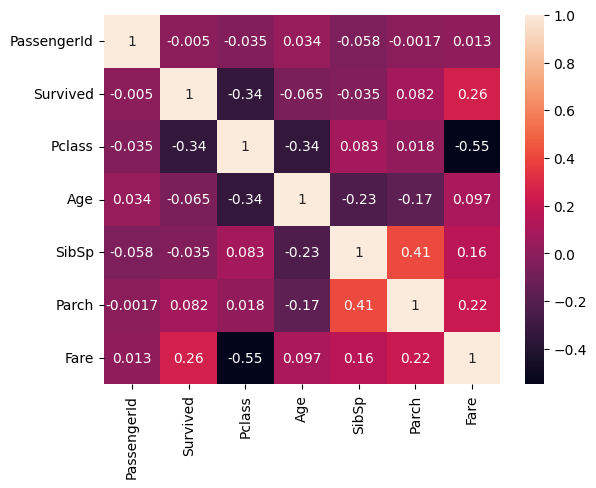

In [38]:
sns.heatmap(s,annot=True)

In [52]:
def wisker(col):
    q1,q3=np.percentile(col,[25,77])
    iqr=q3-q1
    low=q1-1.5*iqr
    upper=q3+1.5*iqr
    return low,upper


In [53]:
wisker(titanic_dataset["Age"])

(np.float64(1.0), np.float64(57.0))

In [55]:
for i in ['Age','Fare']:
    low,upper=wisker( titanic_dataset[i])
    titanic_dataset[i]=np.where(titanic_dataset[i]<low ,low,titanic_dataset[i])
    titanic_dataset[i]=np.where(titanic_dataset[i]>upper ,upper,titanic_dataset[i])

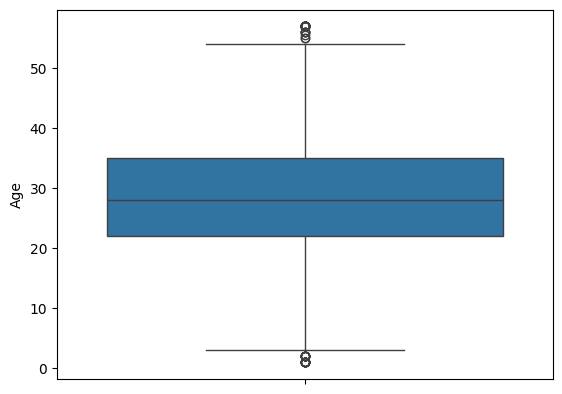

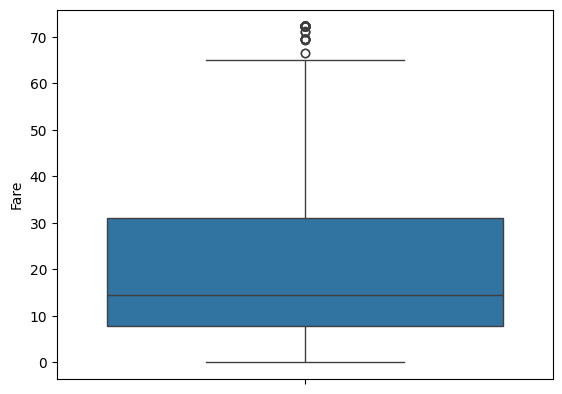

In [57]:
for i in ['Age','Fare']:
    sns.boxplot(titanic_dataset[i])
    plt.show()

In [66]:
encoded_data=pd.get_dummies(data=titanic_dataset,columns=['Name', 'Sex', 'Ticket', 'Embarked'],drop_first=True)
encoded_data = encoded_data.astype(int)
encoded_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735,Embarked_Q,Embarked_S
0,1,0,3,22,1,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38,1,0,71,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,26,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35,1,0,53,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35,0,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,19,0,0,30,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,28,1,2,23,0,0,0,...,0,0,1,0,0,0,0,0,0,1
889,890,1,1,26,0,0,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
non_numerical_cols = titanic_dataset.select_dtypes(exclude=['number']).columns
non_numerical_cols

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

<Figure size 1200x1000 with 0 Axes>

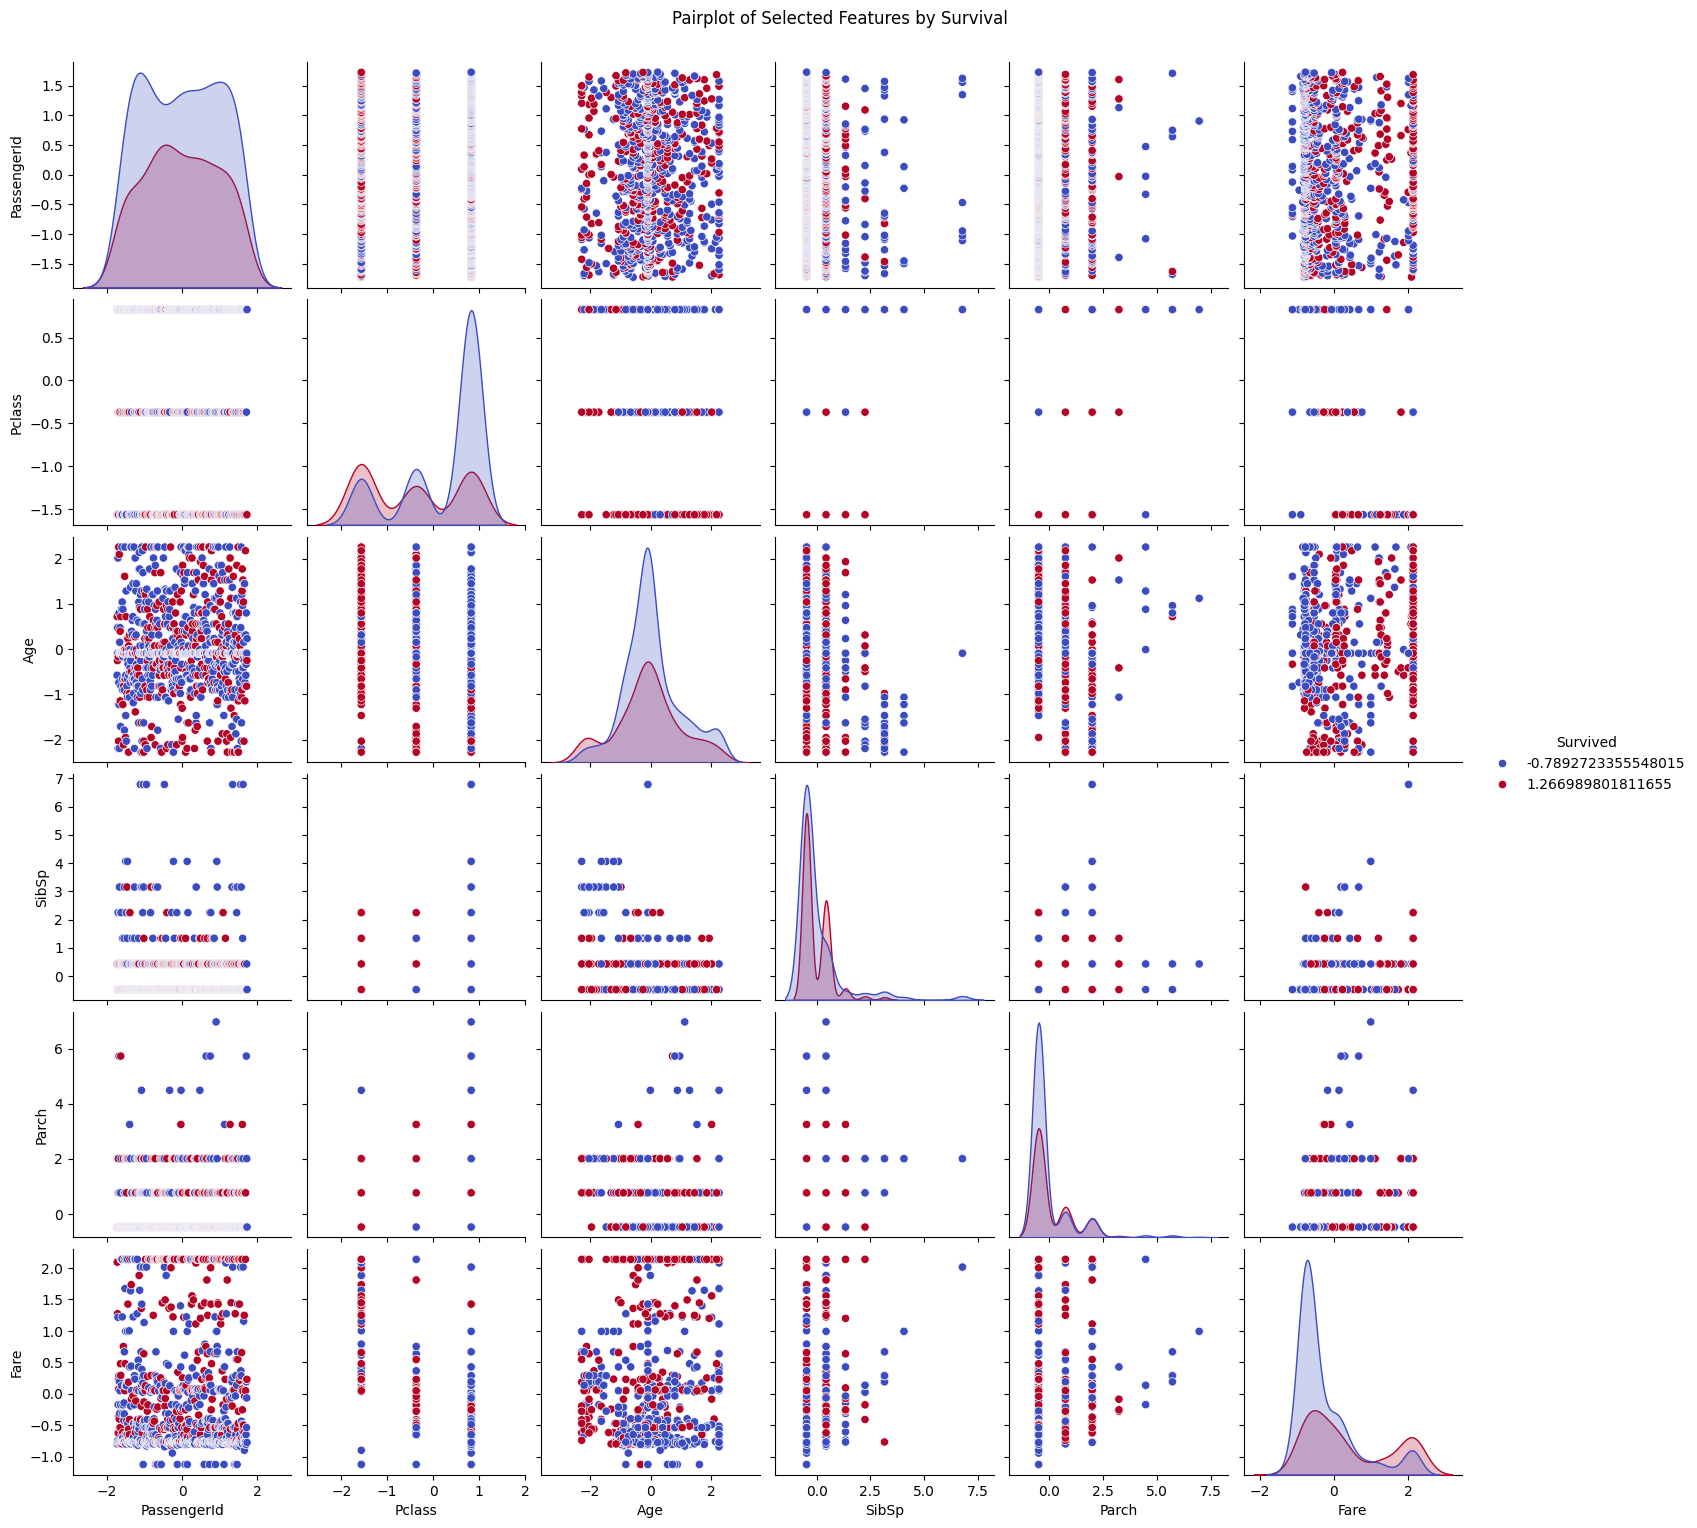

In [105]:
plt.figure(figsize=(12, 10))
sns.pairplot(encoded_data[['PassengerId', 'Survived', 'Pclass',  'Age', 'SibSp',
       'Parch',  'Fare']], hue='Survived', palette='coolwarm')
plt.suptitle('Pairplot of Selected Features by Survival', y=1.02)
plt.show()

In [89]:
numerical_cols = titanic_dataset.select_dtypes(include=['number']).columns
numerical_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

normalization

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
encoded_data[numerical_cols] = scaler.fit_transform(titanic_dataset[numerical_cols])

print(encoded_data.head())

   PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare  \
0    -1.730108 -0.789272  0.827377 -0.575648  0.432793 -0.473674 -0.794347   
1    -1.726220  1.266990 -1.566107  0.718436  0.432793 -0.473674  2.092973   
2    -1.722332  1.266990  0.827377 -0.252127 -0.474545 -0.473674 -0.763910   
3    -1.718444  1.266990 -1.566107  0.475795  0.432793 -0.473674  1.273072   
4    -1.714556 -0.789272  0.827377  0.475795 -0.474545 -0.473674 -0.758274   

   Name_Abbott, Mr. Rossmore Edward  Name_Abbott, Mrs. Stanton (Rosa Hunt)  \
0                                 0                                      0   
1                                 0                                      0   
2                                 0                                      0   
3                                 0                                      0   
4                                 0                                      0   

   Name_Abelson, Mr. Samuel  ...  Ticket_W./C. 14258  Ticket_W

In [72]:
columns = titanic_dataset.columns
print(columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


feature_selection"اتخنقت "

In [ ]:
correlation_matrix = encoded_data.corr()
high_correlation = correlation_matrix.stack().reset_index()
high_correlation.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_correlation = correlation_matrix[correlation_matrix > 0.9]
print(high_correlation.columns )

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Name_Abbott, Mr. Rossmore Edward',
       'Name_Abbott, Mrs. Stanton (Rosa Hunt)', 'Name_Abelson, Mr. Samuel',
       ...
       'Ticket_W./C. 14258', 'Ticket_W./C. 14263', 'Ticket_W./C. 6607',
       'Ticket_W./C. 6608', 'Ticket_W./C. 6609', 'Ticket_W.E.P. 5734',
       'Ticket_W/C 14208', 'Ticket_WE/P 5735', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=1580)


In [93]:
features = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
X = titanic_dataset[features]  
y = titanic_dataset['Survived']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()



In [ ]:
param_grid=[
    {'C': [0.1, 1, 10],               #reg 
    'penalty': ['l1', 'l2'],         #  lasso , ridge  
    'solver': ['liblinear', 'saga'], #  binary  "small",stochastic optimizer "big" 
    'max_iter': [100, 200, 300],     
    'multi_class': ['ovr', 'multinomial'] #one vs one or one vs rest ...multi 
    }

    
]

In [ ]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV( model, param_grid= param_grid, cv=3 , verbose=True ,n_jobs=-1) #speed

In [98]:
clf.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\AL - ELMIA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
54 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AL - ELMIA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AL - ELMIA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\Local

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10], 'max_iter': [100, 200, 300],
                          'multi_class': ['ovr', 'multinomial'],
                          'penalty': ['l1', 'l2'],
                          'solver': ['liblinear', 'saga']}],
             verbose=True)

In [99]:
best_model = clf.best_estimator_

In [100]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 100.00%
Confusion Matrix:
[[105   0]
 [  0  74]]


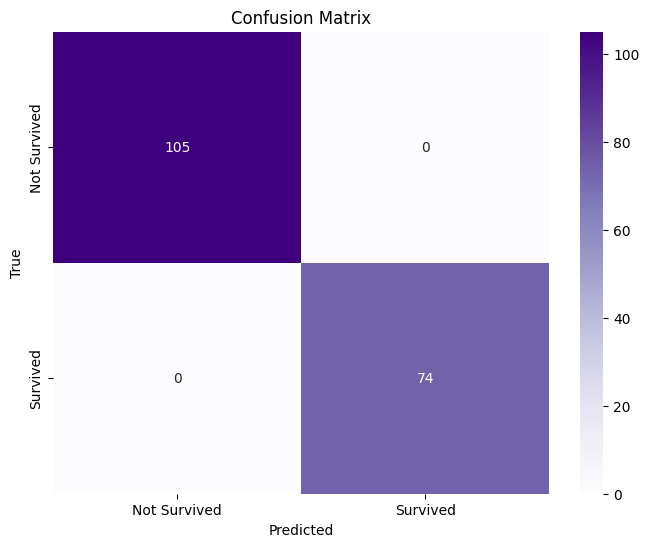

In [108]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
